# 1차 과제

## 16조
2019112127 박세호, 2020112167 민장규, 2020112089 최지안

## 데이터 소개
사용한 dataset : https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction 의 'test.csv'

## 개요

### 데이터 전처리
* 결측치 처리
* 이상치 처리
* 중복값 처리

### Distance & similarity
* distance
* similarity
* conclusion

### Sampling
* confidence interval
* conclusion

### Numeric feature
* Age 분석

### Categorical feature
* scatter plot
* bar chart
* pie chart

### Correlation
* binarization
* numerical feature들 간의 correaltion 분석

### Categorical + Numerical
* Conclusion

### Feature 소개

Gender: 고객 성별 (Female, Male)

Customer Type: 고객 유형 (Loyal customer, disloyal customer)

Age: 고객 나이

Type of Travel: 여행의 유형 (Personal Travel, Business Travel)

Class: 여행객들의 travel class (Business, Eco, Eco Plus)

Flight distance: 여행 거리

Inflight wifi service: wifi 서비스 만족도 (0:Not Applicable;1-5)

Departure/Arrival time convenient: 출발/도착 시간 만족도

Ease of Online booking: online 예약 만족도

Gate location: gate 위치

Food and drink: 식음료 만족도

Online boarding: online 탑승 만족도

Seat comfort: 좌석 만족도

Inflight entertainment: 기내 entertainment 만족도

On-board service: 기내 서비스 만족도

Leg room service: Leg room 서비스 만족도

Baggage handling: 수하물 처리 만족도

Check-in service: 체크인 서비스 만족도

Inflight service: 기내 서비스 만족도

Cleanliness: 청결도 만족도

Departure Delay in Minutes: 출발 지연시간

Arrival Delay in Minutes: 도착 지연시간

Satisfaction: 항공사 만족도(Satisfaction, neutral or dissatisfaction)

# 데이터 전처리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

df = pd.read_csv('test_with_missing_values.csv')

In [2]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0.0,19556.0,Female,Loyal Customer,52.0,Business travel,Eco,160.0,5.0,4.0,...,5.0,5.0,5.0,5.0,2.0,5.0,5.0,50.0,44.0,satisfied
1,1.0,90035.0,Female,Loyal Customer,36.0,Business travel,Business,2863.0,1.0,1.0,...,4.0,4.0,4.0,4.0,3.0,4.0,5.0,0.0,0.0,satisfied
2,2.0,12360.0,Male,disloyal Customer,20.0,Business travel,Eco,192.0,2.0,0.0,...,2.0,4.0,1.0,3.0,2.0,2.0,2.0,0.0,0.0,neutral or dissatisfied
3,3.0,77959.0,Male,Loyal Customer,44.0,Business travel,Business,3377.0,0.0,0.0,...,1.0,1.0,1.0,1.0,3.0,1.0,4.0,0.0,6.0,satisfied
4,4.0,36875.0,NaN,Loyal Customer,49.0,Business travel,Eco,1182.0,2.0,3.0,...,2.0,2.0,2.0,2.0,4.0,2.0,4.0,0.0,20.0,satisfied


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25932 non-null  float64
 1   id                                 25933 non-null  float64
 2   Gender                             25942 non-null  object 
 3   Customer Type                      25927 non-null  object 
 4   Age                                25945 non-null  float64
 5   Type of Travel                     25936 non-null  object 
 6   Class                              25936 non-null  object 
 7   Flight Distance                    25938 non-null  float64
 8   Inflight wifi service              25937 non-null  float64
 9   Departure/Arrival time convenient  25935 non-null  float64
 10  Ease of Online booking             25940 non-null  float64
 11  Gate location                      25944 non-null  flo

## 결측치 처리

In [4]:
print('결측치 제거 전')
df.isnull().sum()

결측치 제거 전


Unnamed: 0                            44
id                                    43
Gender                                34
Customer Type                         49
Age                                   31
Type of Travel                        40
Class                                 40
Flight Distance                       38
Inflight wifi service                 39
Departure/Arrival time convenient     41
Ease of Online booking                36
Gate location                         32
Food and drink                        39
Online boarding                       37
Seat comfort                          38
Inflight entertainment                35
On-board service                      45
Leg room service                      53
Baggage handling                      43
Checkin service                       39
Inflight service                      48
Cleanliness                           42
Departure Delay in Minutes            43
Arrival Delay in Minutes             119
satisfaction    

In [5]:
numeric_columns = df.select_dtypes(include=np.number).columns
for col in numeric_columns:
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)

# 카테고리컬 열의 결측치가 있는 행 제거
categorical_columns = df.select_dtypes(include='object').columns
df.dropna(subset=categorical_columns, how='any', inplace=True)
print('결측치 제거 후')
df.isnull().sum()


결측치 제거 후


Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

## 이상치 처리

numeric한 feature들 ('unnamed', 'id' 제외)을 box plot으로 표현

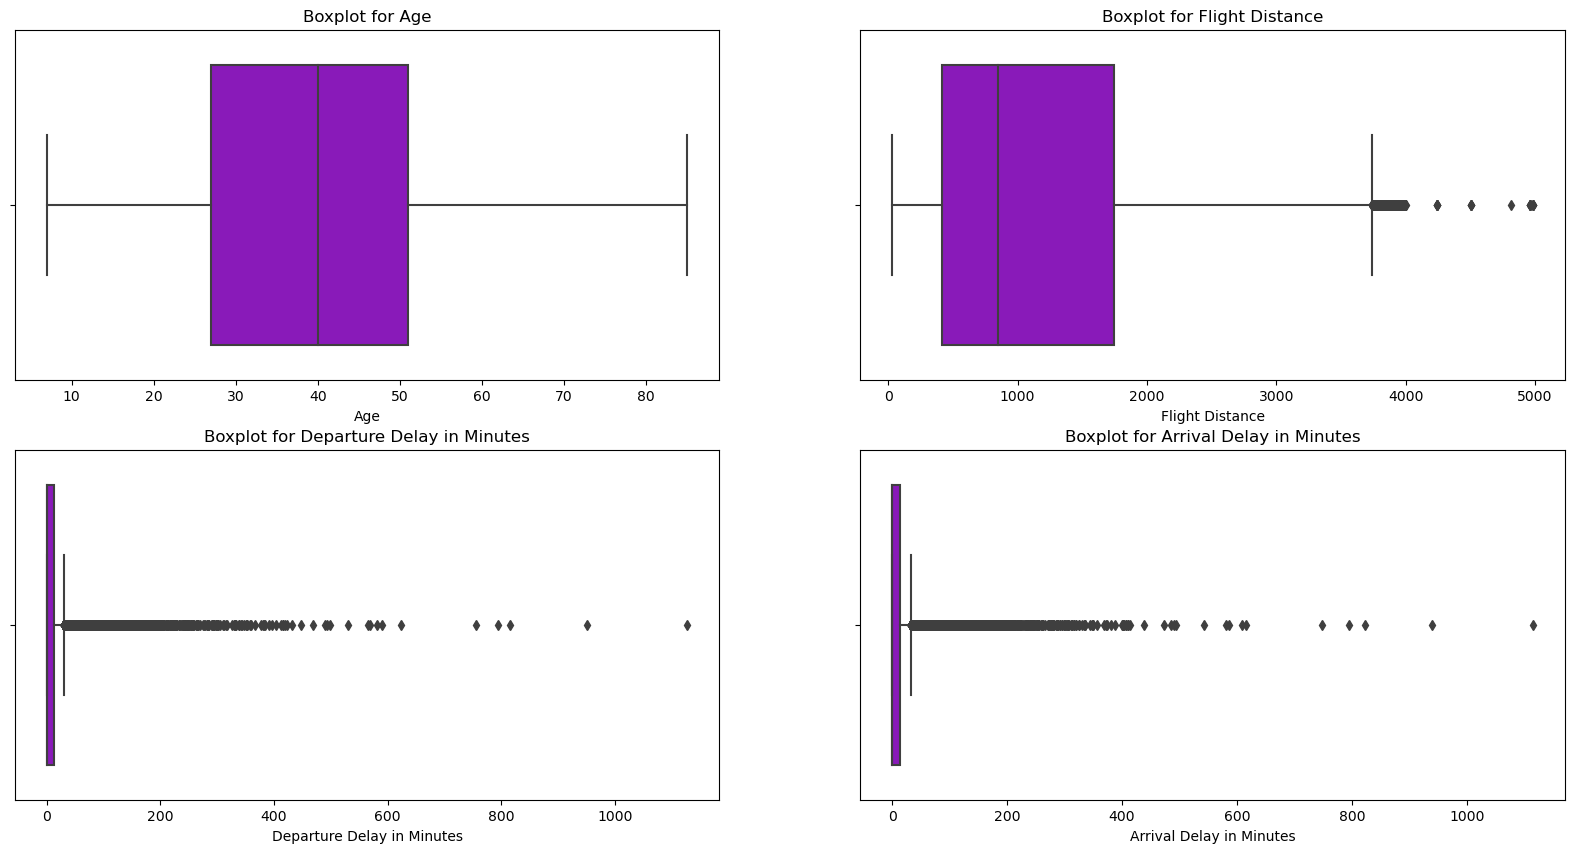

In [6]:
n_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
plt.figure(figsize=(20, 10))

for i, col in enumerate(n_columns):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df[col], color = 'darkviolet')
    plt.title(f'Boxplot for {col}')

plt.show()

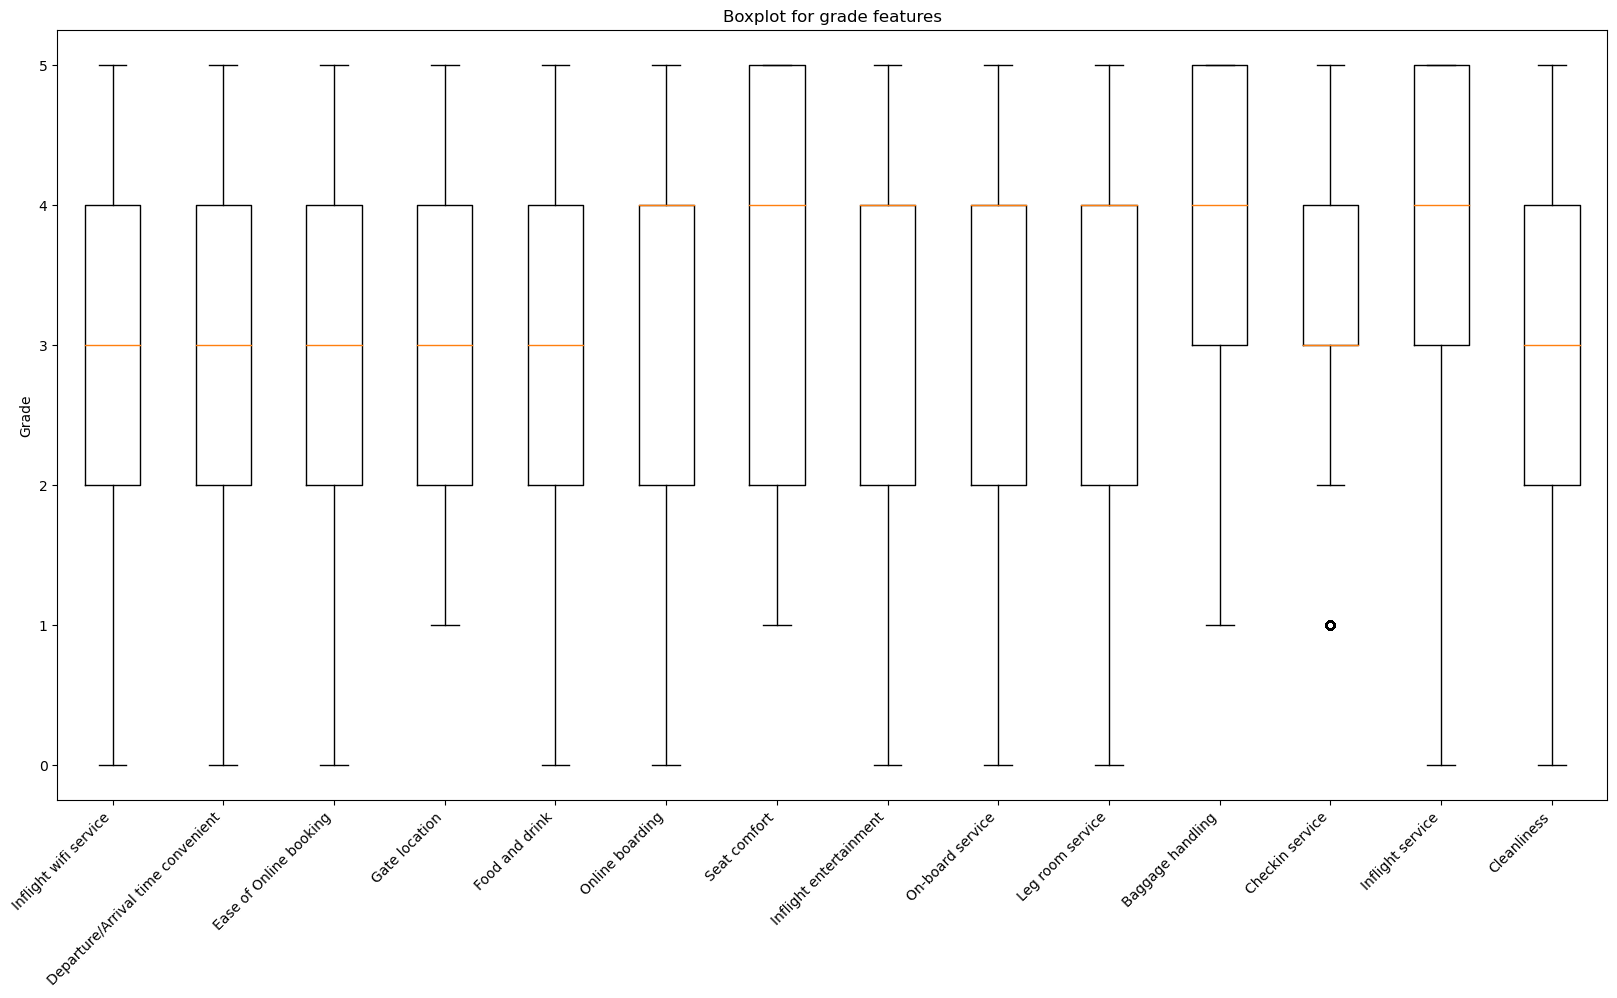

In [7]:
#평점을 나타낸 feature들에 대해 boxplot으로 표현

fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot(df.iloc[:,8:22])
ax.set_xticklabels(df.columns[8:22], rotation=45, ha='right')
plt.title(f'Boxplot for grade features')
ax.set_ylabel('Grade')
plt.show()

## 이상치 제거

In [8]:
numeric_columns = df.iloc[:,2:].select_dtypes(include=np.number).columns
for col in numeric_columns:
    # IQR을 사용하여 이상치 제거
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

### 중복값

In [9]:
# 중복값 제거
df_no_duplicates = df.drop_duplicates()

# Distance & Similarity
- `특정 instance와 가장 가까운 거리에 있는 instance에서 유사도 또한 가장 높을까?` 

- 위의 의문을 해결하기 위해 거리와 유사도를 구하고 두 관계에 대해서 조사한다.

## Distance
- continuous value 사이의 거리를 구하기 위해 전체 feature 중 continuous한 feature만 뽑아내 새로운 데이터프레임을 만들어본다.

- minkowski 거리의 r값 별로 instance 간 거리를 구해본다.

- 정규화된 데이터와 정규화되지 않은 데이터를 구분하여 거리를 구해본다.

- 각 instance가 어떤 instance와 가장 가까운지 조사한다.

In [10]:
# continuous value 만 들어있는 df 생성
# id 값의 경우 거리계산에 중요하지 않은 요소일 것이라 생각되기 때문에 제외

continuous_value = []
for feat, head in zip(df.iloc[0][1:], list(df.columns)[1:]) :
    if type(feat) != str :
        continuous_value.append(head)

        
df_continuous = pd.DataFrame([])
for feat in continuous_value :
    if feat != "id" :
        df_continuous[feat] = df[feat]
    
df_continuous

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
1,36.0,2863.0,1.0,1.0,3.0,1.0,5.0,4.0,5.0,4.0,4.0,4.0,4.0,3.0,4.0,5.0,0.0,0.0
2,20.0,192.0,2.0,0.0,2.0,4.0,2.0,2.0,2.0,2.0,4.0,1.0,3.0,2.0,2.0,2.0,0.0,0.0
3,44.0,3377.0,0.0,0.0,0.0,2.0,3.0,4.0,4.0,1.0,1.0,1.0,1.0,3.0,1.0,4.0,0.0,6.0
8,47.0,556.0,5.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,2.0,2.0,5.0,3.0,3.0,5.0,1.0,0.0
11,33.0,325.0,2.0,5.0,5.0,5.0,1.0,3.0,4.0,2.0,2.0,2.0,2.0,3.0,2.0,4.0,18.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25970,36.0,432.0,1.0,5.0,1.0,3.0,4.0,1.0,4.0,4.0,5.0,2.0,5.0,2.0,3.0,4.0,0.0,0.0
25971,34.0,526.0,3.0,3.0,3.0,1.0,4.0,3.0,4.0,4.0,3.0,2.0,4.0,4.0,5.0,4.0,0.0,0.0
25972,23.0,646.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,4.0,0.0,0.0
25973,17.0,828.0,2.0,5.0,1.0,5.0,2.0,1.0,2.0,2.0,4.0,3.0,4.0,5.0,4.0,2.0,0.0,0.0


In [11]:
# 정규화

df_normalization = (df_continuous - df_continuous.min())/df_continuous.max()

df_normalization

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
1,0.341176,0.757422,0.2,0.2,0.6,0.0,1.0,0.8,0.8,0.8,0.8,0.8,0.6,0.2,0.8,0.8,0.000000,0.000000
2,0.152941,0.043060,0.4,0.0,0.4,0.6,0.4,0.4,0.2,0.4,0.8,0.2,0.4,0.0,0.4,0.2,0.000000,0.000000
3,0.435294,0.894892,0.0,0.0,0.0,0.2,0.6,0.8,0.6,0.2,0.2,0.2,0.0,0.2,0.2,0.6,0.000000,0.500000
8,0.470588,0.140412,1.0,0.4,0.4,0.2,1.0,1.0,0.8,1.0,0.4,0.4,0.8,0.2,0.6,0.8,0.033333,0.000000
11,0.305882,0.078631,0.4,1.0,1.0,0.8,0.2,0.6,0.6,0.4,0.4,0.4,0.2,0.2,0.4,0.6,0.600000,0.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25970,0.341176,0.107248,0.2,1.0,0.2,0.4,0.8,0.2,0.6,0.8,1.0,0.4,0.8,0.0,0.6,0.6,0.000000,0.000000
25971,0.317647,0.132388,0.6,0.6,0.6,0.0,0.8,0.6,0.6,0.8,0.6,0.4,0.6,0.4,1.0,0.6,0.000000,0.000000
25972,0.188235,0.164482,0.8,0.8,0.8,0.6,0.8,0.8,0.6,0.8,0.8,1.0,0.8,0.6,1.0,0.6,0.000000,0.000000
25973,0.117647,0.213159,0.4,1.0,0.2,0.8,0.4,0.2,0.2,0.4,0.8,0.6,0.6,0.6,0.8,0.2,0.000000,0.000000


In [12]:
# r이 k일때의 i행과 j행사이의 minkowski_distance를 구해준다.
def minkowski_distance(i, j, k) :
    return np.linalg.norm(df_continuous.iloc[i] - df_continuous.iloc[j], ord = k)

# r이 k일때의 정규화된 데이터의 i행과 j행사이의 minkowski_distance를 구해준다.
def normalized_minkowski_distance(i, j, k) :
    return np.linalg.norm(df_normalization.iloc[i] - df_normalization.iloc[j], ord = k)

# 각 instance간의 거리를 모두 구해주고 이를 데이터프레임으로 반환한다.
# 단, 모든 행에 대해 구하기에는 데이터의 크기가 너무 크기에, 첫 100행의 각 행끼리의 거리를 구한다.
def return_df_distance(ordval, method) :
        df_distance = []
        for i in range(100) :
            lst = []
            if method == "normalized" :
                for j in range(100) :
                    lst.append(normalized_minkowski_distance(i, j, ordval))
            elif method == "unnormalized" : 
                for j in range(100) : 
                    lst.append(minkowski_distance(i, j, ordval))
            df_distance.append(lst)
        df_distance = pd.DataFrame(df_distance)

        return df_distance

# 각 instance가 어떤 instance랑 가장 가까운지 찾아내어, 그 때 해당 instance의 index와 거리를 찾아내는 함수이다.
# 자기 자신과의 거리는 당연히 0이므로, 이는 제외한다.
def return_min_distance_lst(df) :
    min_distance_lst = []
    for i, row in df.iterrows():
        min_index = np.inf
        min_distance = np.inf
        for j, d in enumerate(row) :
            if i == j : 
                continue
            if d < min_distance :
                min_index = j
                min_distance = d
        min_distance_lst.append([min_index, min_distance])
    min_distance_lst = pd.Series(min_distance_lst)

    return min_distance_lst

### case 1: unnormlized && r = 1

In [13]:
print(return_min_distance_lst(return_df_distance(1, "unnormalized")))
return_df_distance(1, "unnormalized")

0     [82, 206.0]
1      [79, 47.0]
2      [52, 68.0]
3      [89, 30.0]
4      [48, 55.0]
         ...     
95     [47, 37.0]
96     [11, 33.0]
97     [65, 39.0]
98     [10, 74.0]
99     [48, 38.0]
Length: 100, dtype: object


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,2713.0,553.0,2334.0,2594.0,1889.0,1970.0,2830.0,2170.0,1824.0,...,297.0,2564.0,1728.0,2737.0,2613.0,2457.0,1484.0,1207.0,939.0,2553.0
1,2713.0,0.0,3236.0,421.0,191.0,880.0,799.0,163.0,563.0,949.0,...,3000.0,221.0,1067.0,60.0,116.0,288.0,1271.0,1528.0,1852.0,184.0
2,553.0,3236.0,0.0,2857.0,3105.0,2420.0,2501.0,3339.0,2703.0,2351.0,...,288.0,3079.0,2241.0,3262.0,3144.0,2986.0,2003.0,1718.0,1468.0,3072.0
3,2334.0,421.0,2857.0,0.0,296.0,477.0,394.0,512.0,222.0,542.0,...,2603.0,248.0,668.0,445.0,319.0,163.0,888.0,1145.0,1451.0,249.0
4,2594.0,191.0,3105.0,296.0,0.0,749.0,660.0,302.0,440.0,818.0,...,2883.0,100.0,916.0,219.0,123.0,191.0,1152.0,1405.0,1727.0,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2457.0,288.0,2986.0,163.0,191.0,618.0,543.0,423.0,319.0,683.0,...,2740.0,169.0,815.0,334.0,228.0,0.0,1019.0,1276.0,1590.0,164.0
96,1484.0,1271.0,2003.0,888.0,1152.0,433.0,526.0,1352.0,720.0,364.0,...,1743.0,1094.0,266.0,1299.0,1179.0,1019.0,0.0,291.0,589.0,1105.0
97,1207.0,1528.0,1718.0,1145.0,1405.0,708.0,789.0,1635.0,989.0,639.0,...,1480.0,1373.0,529.0,1552.0,1432.0,1276.0,291.0,0.0,344.0,1362.0
98,939.0,1852.0,1468.0,1451.0,1727.0,982.0,1087.0,1931.0,1299.0,919.0,...,1188.0,1651.0,815.0,1880.0,1748.0,1590.0,589.0,344.0,0.0,1680.0


### case 2: normlized && r = 1

In [14]:
print(return_min_distance_lst(return_df_distance(1, "normalized")))
return_df_distance(1, "normalized")

0      [90, 2.106971036609348]
1      [76, 1.453540581785001]
2      [97, 3.366164277960449]
3       [60, 2.50955534928601]
4     [43, 3.2763937615698864]
                ...           
95      [18, 2.93962840016991]
96     [84, 1.137480137816025]
97     [46, 2.493692871639161]
98      [5, 1.422261378474899]
99     [42, 2.470906030237717]
Length: 100, dtype: object


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000000,6.102597,5.731588,3.779755,7.497419,5.613502,2.239889,7.041554,6.296498,4.666438,...,2.106971,6.742426,5.983007,5.805808,2.765159,5.292686,5.339943,3.399283,5.320652,4.946170
1,6.102597,0.000000,5.834185,6.248333,5.371846,7.924390,5.705846,4.115427,3.139432,7.412630,...,6.209568,5.101348,5.990178,3.514976,4.278615,5.327558,4.268537,4.468021,7.346651,3.697604
2,5.731588,5.834185,0.000000,6.523107,6.229006,9.956854,6.583241,7.451572,8.028086,8.209790,...,5.506969,7.885778,6.726360,5.937396,6.355570,6.224274,7.283295,3.366164,9.264004,6.136581
3,3.779755,6.248333,6.523107,0.000000,6.776487,4.566253,2.657513,6.461799,6.867570,3.630964,...,4.427903,6.229337,4.141846,5.951544,4.769718,5.038421,5.286871,3.980472,4.764985,4.950729
4,7.497419,5.371846,6.229006,6.776487,0.000000,6.919211,6.434000,6.114723,3.647979,6.407451,...,8.004390,6.096169,3.984999,5.875057,7.304995,6.228262,5.663358,5.062842,7.541473,5.492425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5.292686,5.327558,6.224274,5.038421,6.228262,5.914479,4.895934,3.842985,4.729521,4.602719,...,4.599657,5.943857,5.980267,6.042534,3.966591,0.000000,4.258625,4.458109,5.336740,5.347602
96,5.339943,4.268537,7.283295,5.286871,5.663358,4.744147,4.899946,2.901610,2.862438,4.126495,...,4.741032,4.202483,5.043064,4.771748,4.789922,4.258625,0.000000,4.740660,4.678115,4.170933
97,3.399283,4.468021,3.366164,3.980472,5.062842,7.414219,4.040606,6.042271,5.461922,5.667155,...,3.341548,6.543143,4.183725,4.171232,4.189406,4.458109,4.740660,0.000000,6.878631,4.370417
98,5.320652,7.346651,9.264004,4.764985,7.541473,1.422261,5.107472,5.956196,5.540552,3.134021,...,5.357035,6.245303,4.356473,7.849862,5.468036,5.336740,4.678115,6.878631,0.000000,6.049047


### case 3: unnormlized && r = 2

In [15]:
print(return_min_distance_lst(return_df_distance(2, "unnormalized")))
return_df_distance(2, "unnormalized")

0      [82, 183.2266356182965]
1     [79, 14.106735979665885]
2     [52, 26.419689627245813]
3      [89, 9.899494936611665]
4     [48, 19.157244060668017]
                ...           
95    [47, 11.704699910719626]
96     [11, 22.02271554554524]
97    [65, 20.074859899884732]
98     [71, 40.11234224026316]
99    [48, 13.856406460551018]
Length: 100, dtype: object


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000000,2671.059528,514.158536,2307.033160,2538.090227,1854.045037,1938.093393,2780.054676,2135.024590,1788.083331,...,268.776859,2512.123405,1674.165464,2705.020333,2597.011552,2414.100868,1447.077745,1185.032067,891.359075,2526.016033
1,2671.059528,0.000000,3185.102510,365.101356,135.214644,817.483945,733.805833,113.362251,536.157626,883.632842,...,2939.230512,163.881054,997.724912,35.832946,77.459667,257.165316,1224.361466,1486.191105,1780.476902,146.758305
2,514.158536,3185.102510,0.000000,2821.021978,3052.085025,2368.044763,2452.053629,3294.025045,2649.058135,2302.050173,...,246.487322,3026.059980,2188.077924,3219.050170,3111.016233,2928.161539,1961.038755,1699.015009,1405.157642,3040.016776
3,2307.033160,365.101356,2821.021978,0.000000,232.318747,453.066220,369.172047,473.119435,173.008670,519.056837,...,2575.023689,205.567507,633.149271,398.493413,290.136175,111.941949,860.038371,1122.027183,1416.078741,219.182572
4,2538.090227,135.214644,3052.085025,232.318747,0.000000,684.449414,600.451497,243.133708,403.405503,750.529147,...,2806.175155,42.118879,864.400370,168.359734,63.427124,127.007874,1091.307473,1353.192891,1647.358188,25.317978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2414.100868,257.165316,2928.161539,111.941949,127.007874,560.933151,477.586641,367.743117,279.558581,627.140335,...,2682.321383,107.717222,741.233432,291.468695,185.078362,0.000000,967.616143,1229.337220,1523.683694,115.481600
96,1447.077745,1224.361466,1961.038755,860.038371,1091.307473,407.076160,491.159852,1333.022130,688.252861,341.068908,...,1715.028571,1065.065256,227.402726,1258.182419,1150.043043,967.616143,0.000000,262.165978,556.155554,1079.043558
97,1185.032067,1486.191105,1699.015009,1122.027183,1353.192891,669.088933,753.139429,1595.045767,950.113151,603.127681,...,1453.067789,1327.125842,489.314827,1520.078287,1412.015581,1229.337220,262.165978,0.000000,294.662519,1341.015287
98,891.359075,1780.476902,1405.157642,1416.078741,1647.358188,963.108509,1047.100282,1889.049232,1244.362086,897.050166,...,1159.035806,1621.025910,783.093226,1814.296007,1706.114885,1523.683694,556.155554,294.662519,0.000000,1635.120179


### case 4: normlized && r = 2

In [16]:
print(return_min_distance_lst(return_df_distance(2, "normalized")))
return_df_distance(2, "normalized")

0       [6, 0.8094440566733122]
1       [76, 0.677195675172982]
2      [97, 1.0082744563903496]
3      [17, 0.7814705247466598]
4      [43, 1.0970104774782905]
                ...            
95     [23, 0.9729207908543421]
96    [84, 0.44989244293833625]
97     [12, 0.9356090233255568]
98      [5, 0.7832387000552825]
99     [42, 0.8014575935849342]
Length: 100, dtype: object


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000000,1.739467,1.672649,1.280062,2.049947,1.714559,0.809444,1.948204,1.836833,1.394314,...,0.860524,2.040731,1.807155,1.723418,1.203084,1.522456,1.553435,1.089599,1.642105,1.503793
1,1.739467,0.000000,1.641749,1.741117,1.674794,2.177455,1.615944,1.349434,1.342290,1.989347,...,1.776861,1.553167,1.760818,1.375243,1.291271,1.551833,1.408391,1.338346,2.089997,1.108374
2,1.672649,1.641749,0.000000,1.985345,1.992479,2.744386,1.822095,2.107132,2.177103,2.424440,...,1.635316,2.239670,1.975442,1.871452,1.839251,1.933816,2.041698,1.008274,2.542958,1.841631
3,1.280062,1.741117,1.985345,0.000000,1.942250,1.528374,0.971185,1.850082,1.917983,1.159241,...,1.444511,1.882564,1.367839,1.666519,1.459653,1.556811,1.579420,1.361387,1.512589,1.472414
4,2.049947,1.674794,1.992479,1.942250,0.000000,1.917586,1.790839,1.756581,1.164857,1.786191,...,2.139322,1.659485,1.369997,1.839698,2.057119,1.751063,1.581408,1.674832,2.028598,1.559327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.522456,1.551833,1.933816,1.556811,1.751063,1.885588,1.441110,1.111165,1.457891,1.617873,...,1.570729,1.669924,1.720998,1.764422,1.242294,0.000000,1.291080,1.420054,1.663188,1.619196
96,1.553435,1.408391,2.041698,1.579420,1.581408,1.460512,1.431643,1.158790,0.939759,1.236755,...,1.475523,1.286457,1.490123,1.590146,1.449614,1.291080,0.000000,1.431745,1.455630,1.374795
97,1.089599,1.338346,1.008274,1.361387,1.674832,2.105531,1.150165,1.721718,1.664011,1.719657,...,1.137720,1.811461,1.565406,1.368353,1.364826,1.420054,1.431745,0.000000,2.021431,1.314827
98,1.642105,2.089997,2.542958,1.512589,2.028598,0.783239,1.427719,1.613889,1.572114,1.051861,...,1.666823,1.872991,1.447781,2.210970,1.724247,1.663188,1.455630,2.021431,0.000000,1.730913


### case 5: unnormlized && r = ∞

In [17]:
print(return_min_distance_lst(return_df_distance(np.inf, "unnormalized")))
return_df_distance(np.inf, "unnormalized")

0     [82, 183.0]
1       [79, 8.0]
2      [52, 19.0]
3       [89, 7.0]
4      [48, 13.0]
         ...     
95      [47, 7.0]
96     [11, 21.0]
97     [65, 18.0]
98     [71, 29.0]
99     [48, 11.0]
Length: 100, dtype: object


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,2671.0,514.0,2307.0,2538.0,1854.0,1938.0,2780.0,2135.0,1788.0,...,268.0,2512.0,1674.0,2705.0,2597.0,2414.0,1447.0,1185.0,891.0,2526.0
1,2671.0,0.0,3185.0,364.0,133.0,817.0,733.0,109.0,536.0,883.0,...,2939.0,159.0,997.0,34.0,74.0,257.0,1224.0,1486.0,1780.0,145.0
2,514.0,3185.0,0.0,2821.0,3052.0,2368.0,2452.0,3294.0,2649.0,2302.0,...,246.0,3026.0,2188.0,3219.0,3111.0,2928.0,1961.0,1699.0,1405.0,3040.0
3,2307.0,364.0,2821.0,0.0,231.0,453.0,369.0,473.0,172.0,519.0,...,2575.0,205.0,633.0,398.0,290.0,107.0,860.0,1122.0,1416.0,219.0
4,2538.0,133.0,3052.0,231.0,0.0,684.0,600.0,242.0,403.0,750.0,...,2806.0,26.0,864.0,167.0,59.0,124.0,1091.0,1353.0,1647.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2414.0,257.0,2928.0,107.0,124.0,560.0,476.0,366.0,279.0,626.0,...,2682.0,98.0,740.0,291.0,183.0,0.0,967.0,1229.0,1523.0,112.0
96,1447.0,1224.0,1961.0,860.0,1091.0,407.0,491.0,1333.0,688.0,341.0,...,1715.0,1065.0,227.0,1258.0,1150.0,967.0,0.0,262.0,556.0,1079.0
97,1185.0,1486.0,1699.0,1122.0,1353.0,669.0,753.0,1595.0,950.0,603.0,...,1453.0,1327.0,489.0,1520.0,1412.0,1229.0,262.0,0.0,294.0,1341.0
98,891.0,1780.0,1405.0,1416.0,1647.0,963.0,1047.0,1889.0,1244.0,897.0,...,1159.0,1621.0,783.0,1814.0,1706.0,1523.0,556.0,294.0,0.0,1635.0


### case 5: normlized && r = ∞

In [18]:
print(return_min_distance_lst(return_df_distance(np.inf, "normalized")))
return_df_distance(np.inf, "normalized")

0                     [26, 0.4]
1                     [39, 0.4]
2                     [97, 0.5]
3                     [17, 0.4]
4     [21, 0.41666666666666663]
                ...            
95                    [18, 0.4]
96    [84, 0.20000000000000007]
97                     [0, 0.4]
98                    [16, 0.4]
99                    [13, 0.4]
Length: 100, dtype: object


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000000,0.714362,0.600000,0.8,0.8,0.8,0.51832,0.800000,0.800000,0.8,...,0.600000,0.800000,0.8,0.723455,0.800000,0.645627,0.6,0.4,0.8,0.675582
1,0.714362,0.000000,0.851832,0.6,1.0,1.0,0.60000,0.800000,1.000000,0.8,...,0.786039,0.800000,1.0,0.800000,0.600000,0.800000,0.8,0.6,1.0,0.600000
2,0.600000,0.851832,0.000000,1.0,1.0,1.0,0.65579,0.880984,1.000000,1.0,...,0.800000,0.809307,1.0,0.860925,0.832041,0.800000,0.8,0.5,1.0,0.813052
3,0.800000,0.600000,1.000000,0.0,0.8,0.6,0.60000,1.000000,0.600000,0.6,...,0.800000,0.800000,0.6,0.600000,0.800000,0.800000,0.6,0.8,0.6,0.800000
4,0.800000,1.000000,1.000000,0.8,0.0,0.6,0.80000,1.000000,0.583333,0.6,...,0.800000,0.600000,0.8,1.000000,0.800000,0.800000,0.6,0.8,0.6,0.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.645627,0.800000,0.800000,0.8,0.8,0.8,0.80000,0.600000,0.800000,0.8,...,0.800000,0.600000,0.8,0.800000,0.600000,0.000000,0.6,0.6,0.8,0.800000
96,0.600000,0.800000,0.800000,0.6,0.6,0.6,0.60000,0.800000,0.600000,0.6,...,0.600000,0.600000,0.6,0.800000,0.600000,0.600000,0.0,0.6,0.6,0.800000
97,0.400000,0.600000,0.500000,0.8,0.8,0.8,0.40000,0.800000,0.800000,0.8,...,0.600000,0.800000,0.8,0.600000,0.800000,0.600000,0.6,0.0,0.8,0.600000
98,0.800000,1.000000,1.000000,0.6,0.6,0.6,0.60000,0.600000,0.600000,0.6,...,0.800000,0.800000,0.6,1.000000,0.800000,0.800000,0.6,0.8,0.0,0.800000


## Similarity
- continuous value 사이의 유사도를 구하기 위해 위에서 만들어놓은 데이터프레임을 사용한다.

- 정규화된 데이터와 정규화되지 않은 데이터를 구분하여 유사도를 구해본다.

- 각 instance가 어떤 instance와 가장 유사도가 높은지 조사한다.

In [19]:
# 각 instance간 코사인 유사도를 구한다.
# distance를 구했을 때와 같은 이유로, 데이터의 양이 너무 방대하기 때문에 첫 100행에 대해서만 구한다.
def cosine_similarity_lst(is_normalized) :
    df_cosine_similarity = []
    for i in range(100) :
        lst = []
        for j in range(100) :
            if is_normalized :
                lst.append(float(cosine_similarity(np.array(df_normalization.iloc[i]).reshape(1,-1), np.array(df_normalization.iloc[j]).reshape(1,-1))))
            else :
                lst.append(float(cosine_similarity(np.array(df_continuous.iloc[i]).reshape(1,-1), np.array(df_continuous.iloc[j]).reshape(1,-1))))
        df_cosine_similarity.append(lst)
    df_cosine_similarity = pd.DataFrame(df_cosine_similarity)
    
    return df_cosine_similarity

# 거리와 반대로, 가장 유사도가 높은 instance와 해당 instance의 index를 찾아내는 함수이다.
def return_max_cosine_lst(df) :
    max_cosine_lst = []
    for i, row in df.iterrows():
        max_index = np.inf
        max_cosine = 0
        for j, c in enumerate(row) :
            if i == j : 
                continue
            if max_cosine < c :
                max_index = j
                max_cosine = c
        max_cosine_lst.append([max_index, max_cosine])
    max_cosine_lst = pd.Series(max_cosine_lst)

    return max_cosine_lst

### normalize 했을 때, cosine 유사도

In [20]:
print(return_max_cosine_lst(cosine_similarity_lst(is_normalized = True)))
cosine_similarity_lst(True)

0      [6, 0.9530103277815171]
1     [36, 0.9163189687941959]
2      [97, 0.847824330670295]
3     [17, 0.9591083359038045]
4     [43, 0.8932337575294307]
                ...           
95    [23, 0.9336978874433413]
96    [84, 0.9810251920148179]
97     [0, 0.9426656103267906]
98     [5, 0.9728834395192558]
99     [9, 0.9231324500772242]
Length: 100, dtype: object


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,0.784155,0.782502,0.885150,0.667802,0.864542,0.953010,0.683146,0.731252,0.889872,...,0.946140,0.665194,0.763580,0.760242,0.895072,0.819088,0.811635,0.942666,0.859183,0.824080
1,0.784155,1.000000,0.514434,0.799437,0.697972,0.875582,0.830776,0.752240,0.822350,0.829930,...,0.742488,0.731739,0.759765,0.698003,0.803328,0.662779,0.802808,0.702106,0.845906,0.854750
2,0.782502,0.514434,1.000000,0.675175,0.559660,0.582790,0.722979,0.402989,0.445387,0.608019,...,0.778250,0.409938,0.653482,0.488056,0.573865,0.503941,0.523119,0.847824,0.610148,0.553525
3,0.885150,0.799437,0.675175,1.000000,0.709755,0.896655,0.933670,0.726998,0.713503,0.926159,...,0.850653,0.724314,0.867178,0.789418,0.841427,0.817228,0.810732,0.884045,0.882469,0.839947
4,0.667802,0.697972,0.559660,0.709755,1.000000,0.834632,0.746129,0.685425,0.872285,0.812368,...,0.624936,0.740042,0.851900,0.639672,0.579572,0.689044,0.766413,0.702339,0.775277,0.755495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.819088,0.662779,0.503941,0.817228,0.689044,0.867060,0.838574,0.853964,0.777915,0.869806,...,0.793459,0.706531,0.752251,0.607361,0.825833,1.000000,0.829543,0.742695,0.888841,0.693635
96,0.811635,0.802808,0.523119,0.810732,0.766413,0.936994,0.839752,0.863497,0.915292,0.931892,...,0.823050,0.840969,0.822583,0.727948,0.788264,0.829543,1.000000,0.781788,0.912040,0.806367
97,0.942666,0.702106,0.847824,0.884045,0.702339,0.828583,0.925996,0.615133,0.692201,0.865056,...,0.919441,0.630502,0.805020,0.735820,0.775524,0.742695,0.781788,1.000000,0.808597,0.781559
98,0.859183,0.845906,0.610148,0.882469,0.775277,0.972883,0.898421,0.903204,0.889769,0.944572,...,0.855352,0.818711,0.895734,0.737460,0.865660,0.888841,0.912040,0.808597,1.000000,0.870539


### normalize 하지 않았을 때, cosine 유사도

In [21]:
print(return_max_cosine_lst(cosine_similarity_lst(is_normalized = False)))
cosine_similarity_lst(False)

0     [39, 0.9999970429992692]
1     [24, 0.9998054890648274]
2      [0, 0.9999938688480837]
3     [36, 0.9999339143118382]
4     [21, 0.9993979150521981]
                ...           
95    [72, 0.9998782621558371]
96    [42, 0.9999928652611247]
97    [10, 0.9999877283980018]
98    [70, 0.9999977867500162]
99    [54, 0.9998731534302842]
Length: 100, dtype: object


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,0.994978,0.999994,0.997189,0.993774,0.999363,0.998938,0.856339,0.999452,0.999302,...,0.999985,0.987736,0.999342,0.984043,0.988941,0.999532,0.999743,0.999912,0.999829,0.993405
1,0.994978,1.000000,0.994924,0.999433,0.997903,0.997841,0.998253,0.901409,0.997612,0.997902,...,0.995426,0.997620,0.997694,0.996111,0.998282,0.997052,0.996872,0.996113,0.996582,0.999522
2,0.999994,0.994924,1.000000,0.997167,0.993786,0.999340,0.998926,0.856353,0.999434,0.999287,...,0.999983,0.987741,0.999342,0.983979,0.988899,0.999485,0.999738,0.999912,0.999823,0.993383
3,0.997189,0.999433,0.997167,1.000000,0.997955,0.999172,0.999482,0.891775,0.998981,0.999265,...,0.997542,0.996399,0.999153,0.994339,0.997118,0.998603,0.998576,0.998063,0.998370,0.999085
4,0.993774,0.997903,0.993786,0.997955,1.000000,0.996464,0.997427,0.901249,0.996451,0.996554,...,0.994211,0.995913,0.996816,0.994127,0.996224,0.995712,0.995593,0.994883,0.995303,0.997801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.999532,0.997052,0.999485,0.998603,0.995712,0.999836,0.999570,0.868640,0.999833,0.999781,...,0.999618,0.990940,0.999712,0.987895,0.992157,1.000000,0.999815,0.999735,0.999817,0.995682
96,0.999743,0.996872,0.999738,0.998576,0.995593,0.999891,0.999672,0.867627,0.999919,0.999878,...,0.999845,0.990980,0.999874,0.987657,0.991948,0.999815,1.000000,0.999947,0.999986,0.995687
97,0.999912,0.996113,0.999912,0.998063,0.994883,0.999718,0.999431,0.862879,0.999766,0.999692,...,0.999966,0.989668,0.999715,0.986201,0.990744,0.999735,0.999947,1.000000,0.999977,0.994791
98,0.999829,0.996582,0.999823,0.998370,0.995303,0.999840,0.999579,0.865620,0.999872,0.999812,...,0.999908,0.990415,0.999819,0.987039,0.991454,0.999817,0.999986,0.999977,1.000000,0.995320


### Relation with Distance and Similarity
- 거리가 가장 가깝다면 유사도또한 가장 높다 할 수 있는지 확인하고 조사한다.

- 정규화된 데이터와 정규화되지 않은 데이터를 구분하여 관계를 구해본다.

### 정규화된 데이터에서 거리와 유사도의 상관관계

In [22]:
# 일반적으로 가장 거리가 가깝다고 해당 instance와 유사도 또한 가장 높은 건 아니지만 대체적으로 비슷하다 할 수 있다.

df_relation = []
count = 0
for i, j in zip(list(return_min_distance_lst(return_df_distance(2, "normalized"))), list(return_max_cosine_lst(cosine_similarity_lst(is_normalized = True)))) :
    df_relation.append([i[0], j[0]])
    if i[0] == j[0] :
        count += 1
df_relation = pd.DataFrame(df_relation, columns = ["min_distance_index", "max_cosine_index"])

print(count)
df_relation

55


,min_distance_index,max_cosine_index
0,6,6
1,76,36
2,97,97
3,17,17
4,43,43
...,...,...
95,23,23
96,84,84
97,12,0
98,5,5


### 정규화되지 않은 데이터에서 거리와 유사도의 상관관계

In [23]:
# 정규회되지 않은은 데이터에서 거리와 유사도의 상관관계를 조사한다.
# 일반적으로 가장 거리가 가깝다고 해당 instance와 유사도 또한 가장 높은 건 아니지만 대체적으로 비슷하다 할 수 있다.

df_relation_unnormalized = []
count = 0
for i, j in zip(list(return_min_distance_lst(return_df_distance(2, "unnormalized"))), list(return_max_cosine_lst(cosine_similarity_lst(is_normalized = False)))) :
    df_relation_unnormalized.append([i[0], j[0]])
    if i[0] == j[0] :
        count += 1
df_relation_unnormalized = pd.DataFrame(df_relation_unnormalized, columns = ["min_distance_index", "max_cosine_index"])

print(count)
df_relation_unnormalized

14


,min_distance_index,max_cosine_index
0,82,39
1,79,24
2,52,0
3,89,36
4,48,21
...,...,...
95,47,72
96,11,42
97,65,10
98,71,70


## Conclusion
- 거리와 유사도의 관계에 대해 조사해보았다.

- 일반적으로 정규화된 데이터의 경우가 정규화되지 않은 데이터보다 거리와 유사도의 관계가 더 높은걸로 도출되었다.

- 이는 정규화되지 않은 데이터의 경우 특정 feature가 거리를 구하는데 과도하게 영향을 미치기 때문이라 예상된다.

# Sampling
- 특정 feature을 뽑아내 샘플링을 진행하고 신뢰구간 등을 구해본다.

- CLT가 정상적으로 적용되는 지 확인한다.

- 표본의 크기, 신뢰 수준에 따른 구간의 길이를 확인한다.

In [24]:
def plotgraph(sample_means, lower_bound, upper_bound, level) :
    level = int(level*100)
    plt.figure(figsize=(5,3))
    sns.histplot(sample_means, kde=True, bins=30, stat="density")
    plt.title('Distribution of Sample Means with {}% Confidence Interval'.format(level))
    plt.xlabel('Sample Mean')
    plt.ylabel('Density')
    plt.axvline(x=lower_bound, color='red', linestyle='--', label='{}% Lower Bound'.format(level))
    plt.axvline(x=upper_bound, color='red', linestyle='--', label='{}% Upper Bound'.format(level))
    plt.legend()
    plt.show()

In [25]:
# 샘플링 작업을 수행할 함수 구현
def sampling(size, n, col, level) :
    # 표본 평균을 저장할 리스트 초기화
    sample_means = []

    sample_size = size
    n_samples = n
    column = col
    confidence_level = level

    for _ in range(n_samples):
        sample = df[column].sample(n=sample_size, replace=True)
        sample_means.append(sample.mean())

    # 신뢰 구간 계산 (표본 평균의 분포에서)
    lower_p = (1 - confidence_level) / 2
    upper_p = 1 - lower_p
    lower_bound = np.percentile(sample_means, lower_p * 100)
    upper_bound = np.percentile(sample_means, upper_p * 100)

    print(f"{int(confidence_level*100)}% Confidence Interval: ({lower_bound}, {upper_bound})")
    plotgraph(sample_means, lower_bound, upper_bound, confidence_level)

95% Confidence Interval: (833.0275, 1482.5433333333333)


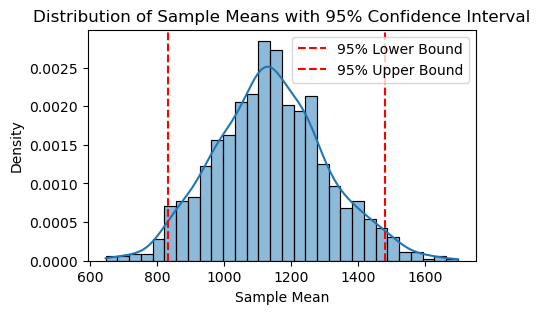

In [26]:
sampling(30, 1000, "Flight Distance", 0.95)

95% Confidence Interval: (987.207, 1323.6149999999998)


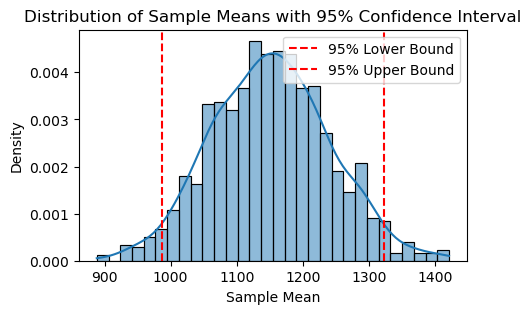

In [27]:
sampling(100, 1000, "Flight Distance", 0.95)

98% Confidence Interval: (758.7243600508907, 1546.3846666666666)


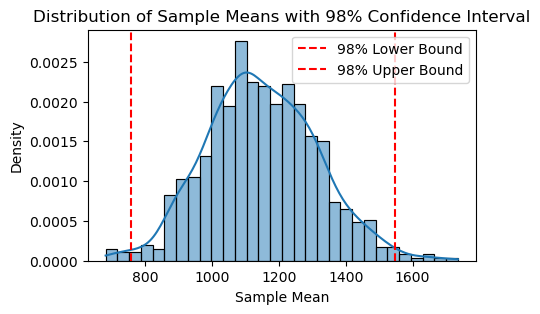

In [28]:
sampling(30, 1000, "Flight Distance", 0.98)

### Conclusion
- 표본의 크기, 신뢰 수준을 다르게 해 샘플링 진행

- 표본의 크기가 작을 수록, 신뢰 구간이 높을 수록 Interval이 길어진다는 것을 확인할 수 있었음.

# Numeric feature

### Age column 분석

In [29]:
df['Age'].describe()

count    16407.000000
mean        39.712984
std         15.165009
min          7.000000
25%         27.000000
50%         40.000000
75%         51.000000
max         85.000000
Name: Age, dtype: float64

<Axes: >

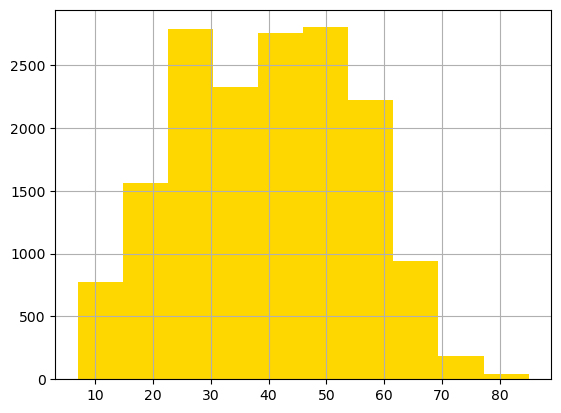

In [30]:
df['Age'].hist(color = 'gold')

# categorical feature

- scatterplot
- bar charts
- pie charts

## scatter plot : 'Age'와 'Flight Distance'

Text(0, 0.5, 'Flight Distance')

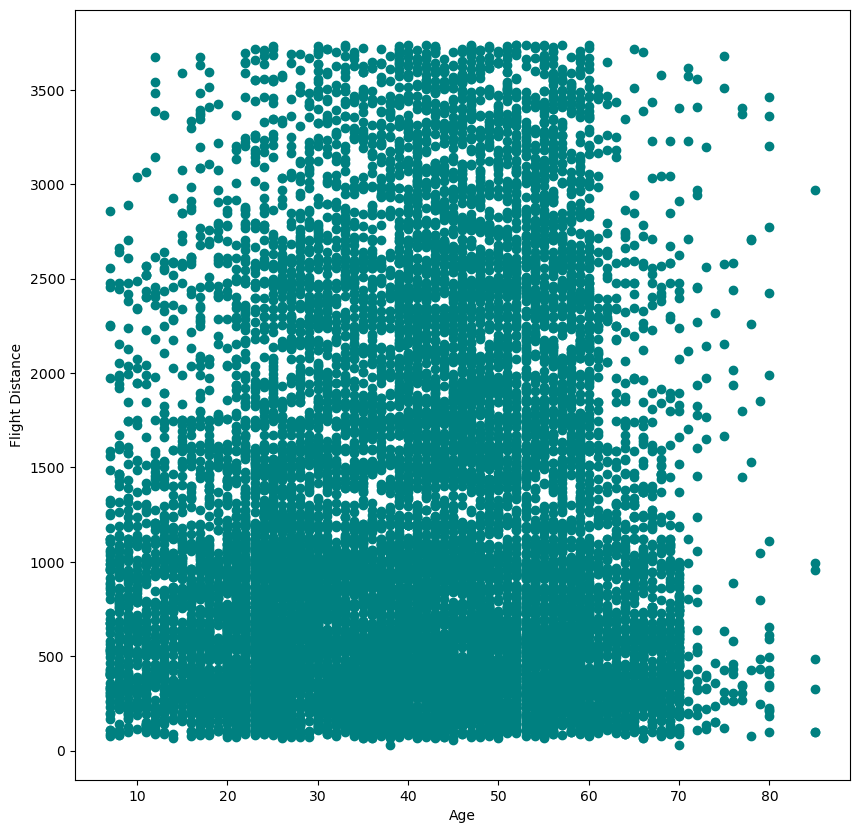

In [31]:
plt.figure(figsize=(10,10))
plt.scatter(df['Age'], df['Flight Distance'], color = 'teal')
plt.xlabel('Age')
plt.ylabel('Flight Distance')

## Pie chart : 'Gender', 'Customer Type', 'Type of Travel')
## Bar chart : 'Class', 'satisfaction'

In [32]:
categorical_feature = []
categorical_variable_list = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

for name in categorical_variable_list:
    categorical_feature.append(df[name].value_counts())

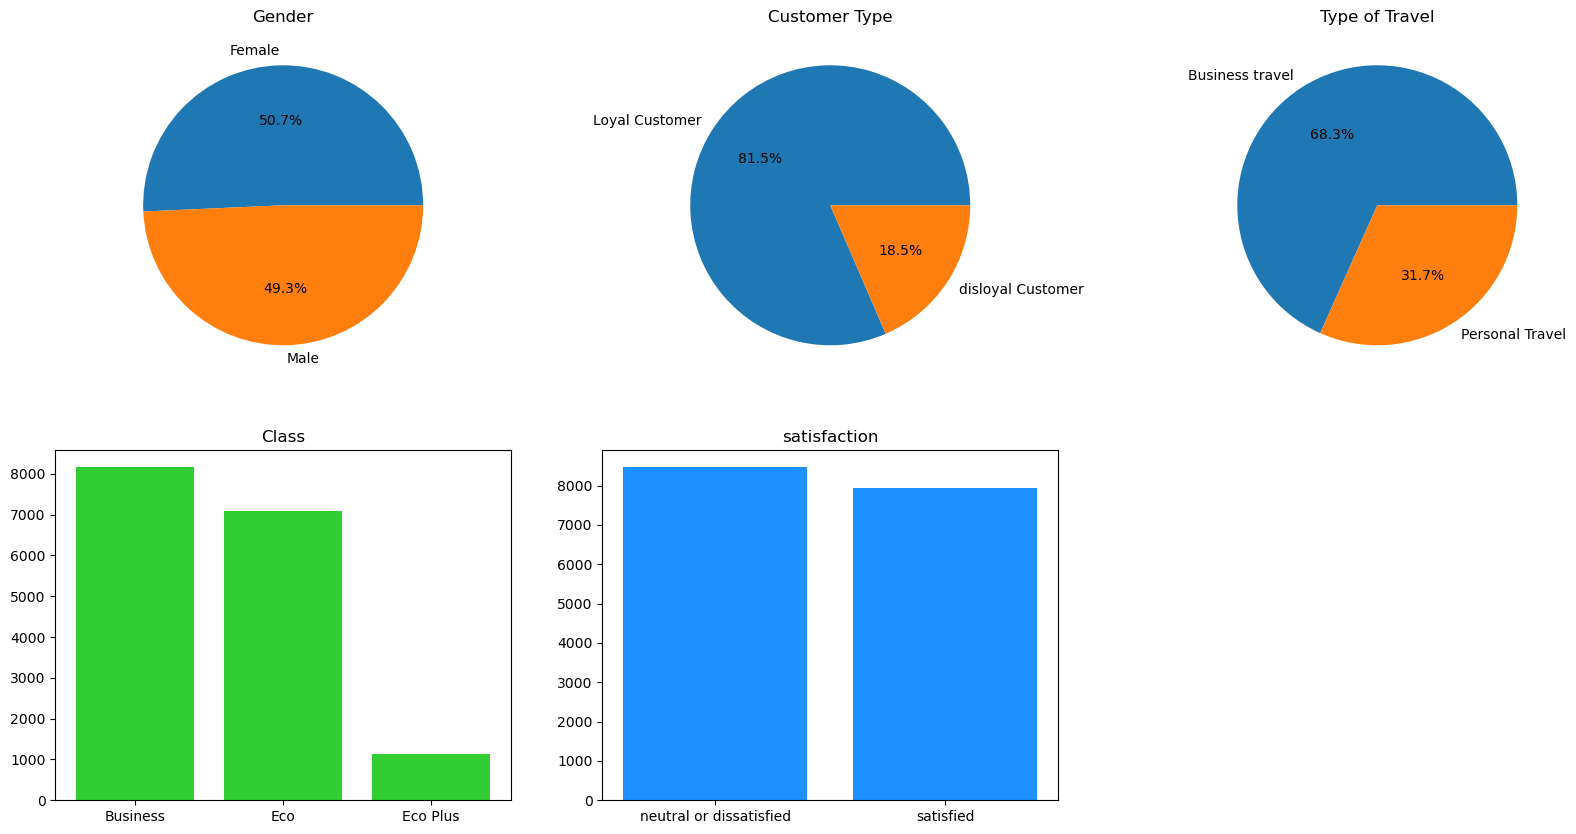

In [33]:
plt.figure(figsize=(20, 10))

for i in range(1,4):
    plt.subplot(2,3,i)
    plt.pie(categorical_feature[i-1], labels=categorical_feature[i-1].index, autopct='%1.1f%%')
    plt.title(categorical_variable_list[i-1])

color_list = ['limegreen', 'dodgerblue']
for j in range(4,6):
    plt.subplot(2,3,j)
    plt.bar(categorical_feature[j-1].index, categorical_feature[j-1], color=color_list[j-4])
    plt.title(categorical_variable_list[j-1])
    
plt.show()

## Correlation

### 'satisfaction' column에 대해 binarization 진행

In [34]:
def binarize(value):
    if value == 'satisfied':
        return 1
    else:
        return 0
df['Satisfied or Not'] = df['satisfaction'].apply(binarize)
df[['satisfaction','Satisfied or Not']]

,satisfaction,Satisfied or Not
1,satisfied,1
2,neutral or dissatisfied,0
3,satisfied,1
8,satisfied,1
11,neutral or dissatisfied,0
...,...,...
25970,neutral or dissatisfied,0
25971,neutral or dissatisfied,0
25972,satisfied,1
25973,neutral or dissatisfied,0


### numerical feature들 간의 상관관계 분석

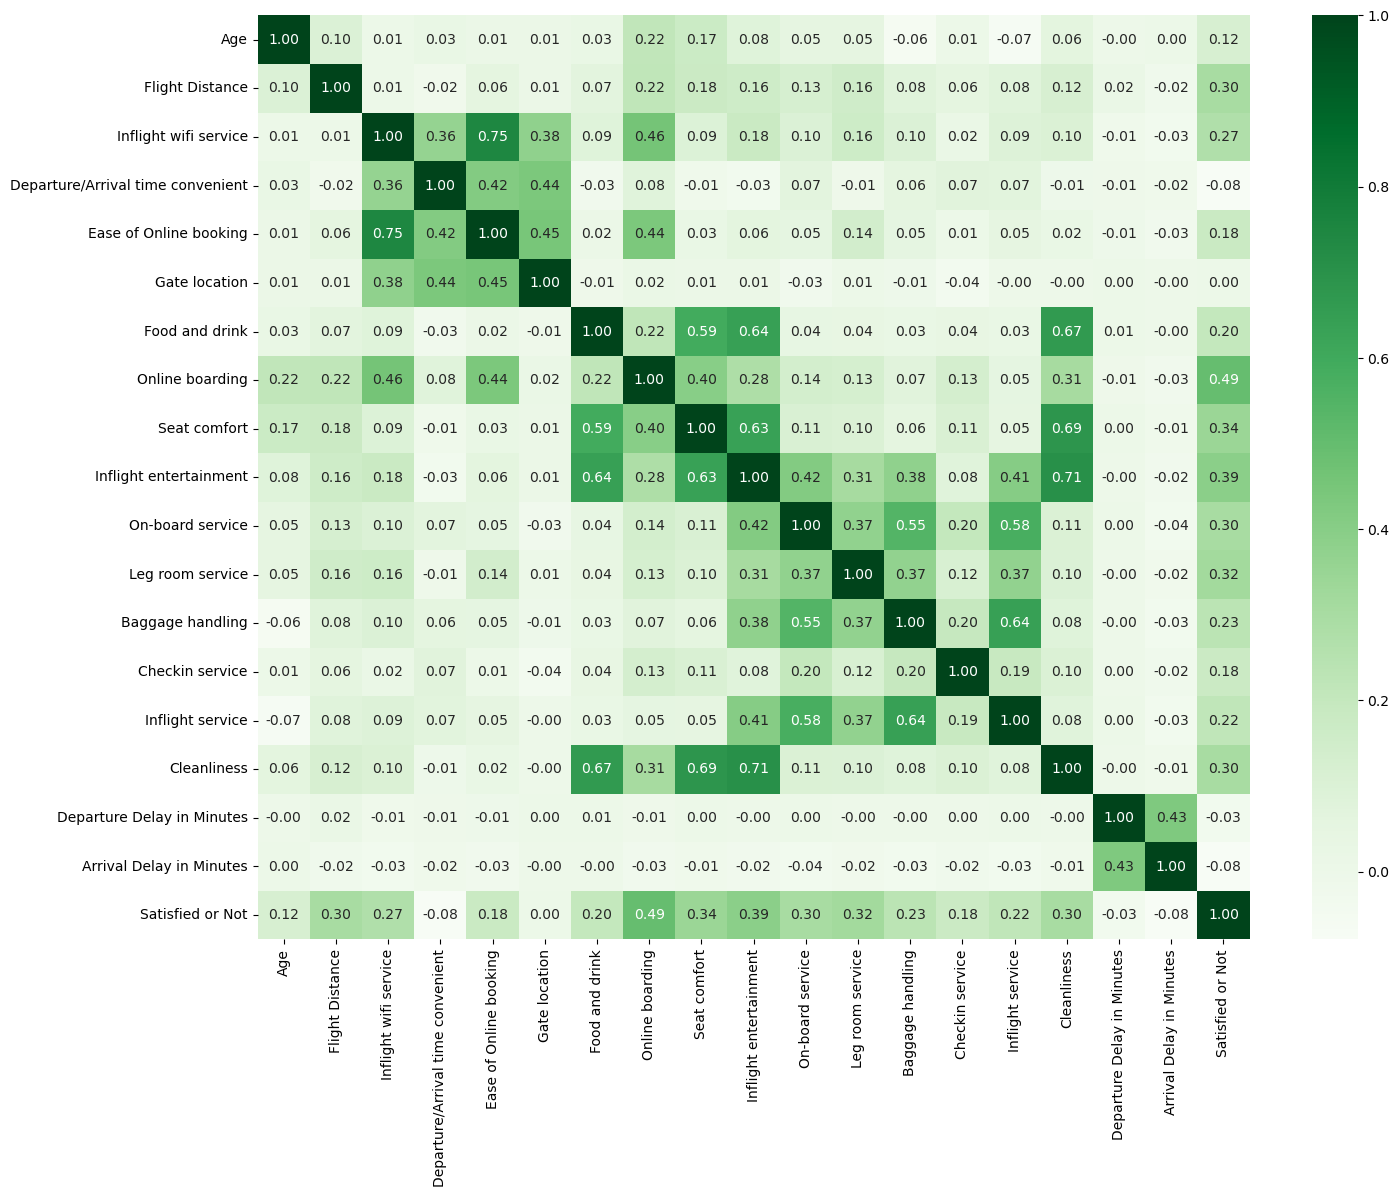

In [35]:
plt.figure(figsize=(16,12))
df2 = df.iloc[:,2:]
corr = df2.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Greens')
plt.show()

In [36]:
# 'Satisfied or Not' column과 상관관계가 높은 변수들을 추출한다.

corr = df2.corr(numeric_only=True)
corr = corr.loc['Satisfied or Not']
corr = corr.drop(['Satisfied or Not'])
corr = corr[abs(corr)>=0.30]
corr = corr.sort_values(ascending=False)
print(corr)

Online boarding           0.494267
Inflight entertainment    0.391287
Seat comfort              0.342513
Leg room service          0.317961
Flight Distance           0.301790
On-board service          0.301695
Cleanliness               0.300560
Name: Satisfied or Not, dtype: float64


## categorical + numerical
Class와 Flight distance 표현

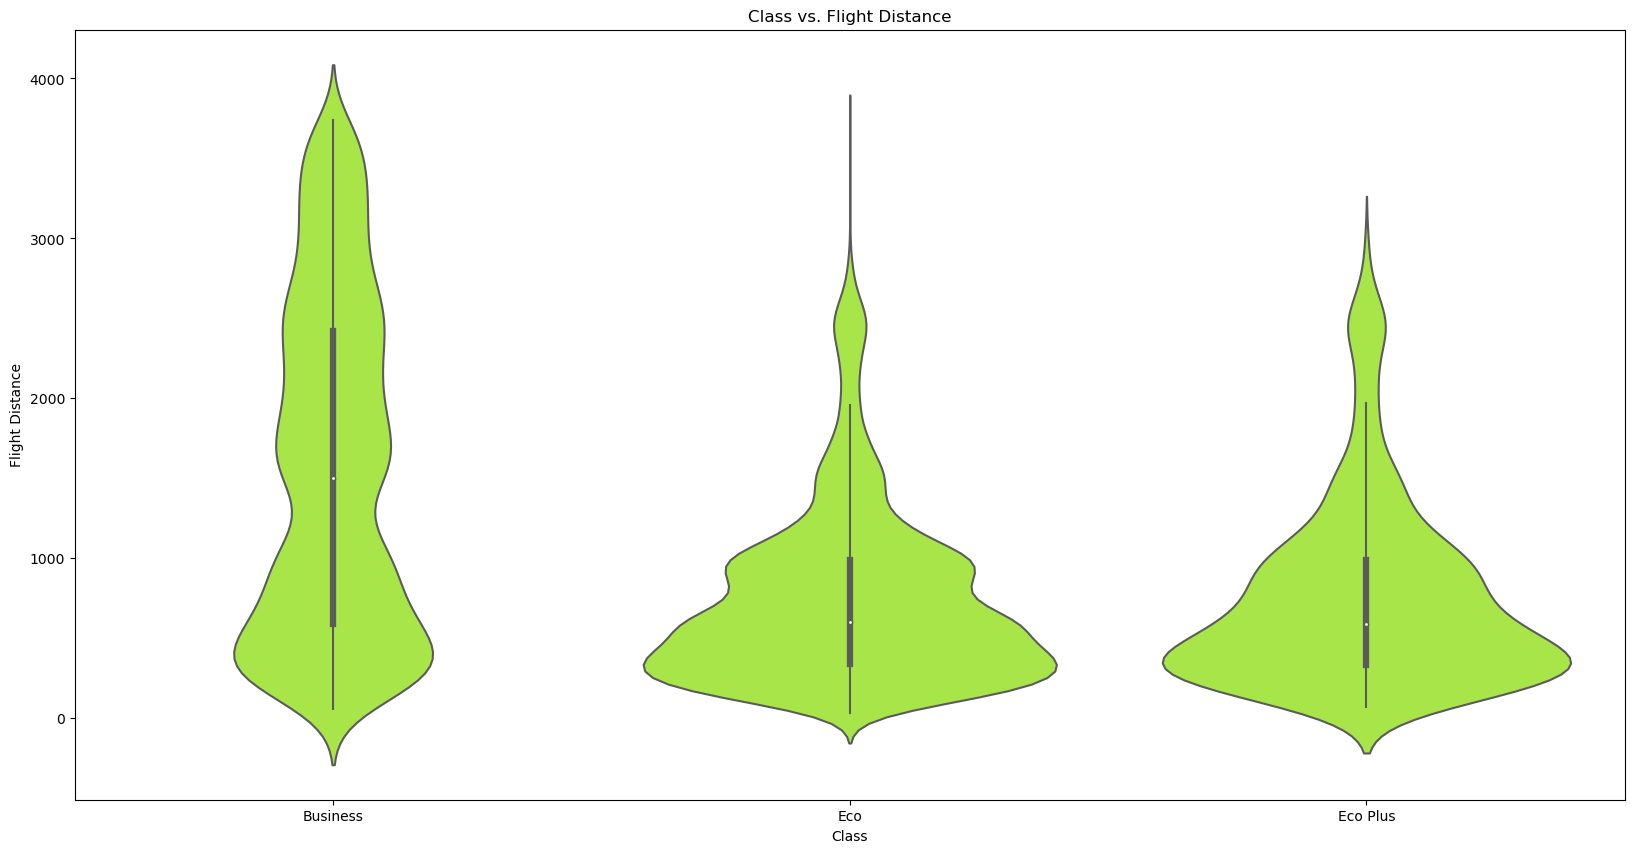

In [37]:
fig = plt.figure(figsize=(20,10))
sns.violinplot(data=df, x=df["Class"], y=df["Flight Distance"], hue=None ,color='greenyellow')
plt.title('Class vs. Flight Distance')
plt.show()

## Conclusion

1. 비행기 탑승 만족도와 연관이 높은 서비스로는 'Online boarding', 'Inflight entertainment', 'Seat comfort' 등이 있었다.
2. 비행기의 클래스가 'Business'일 때, , Flight Distance가 먼 경우가 많았다.